In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import animation as ibl_ani
import numbergen as ng
import imagen as ig
from tqdm import tqdm
import matplotlib.animation as animation
import os
from os.path import join
from evaluation import evaluate, mitsuba_render,net_gt, net_render
import shutil
import imageio 
import cv2

def get_files(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

def get_folders(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]

options:  Namespace(file='/home/ysheng/.local/share/jupyter/runtime/kernel-b8ed2ea4-b26b-4e2e-9bf8-550d9b697ad0.json', ibl=None, mask=None, output=None, verbose=False, weight='../weights/new_pattern_11-May-09-59-PM.pt')
Device:  cuda:2


In [5]:
def show(img, title=''):
    plt.figure(figsize=(15,10))
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [6]:
test_folder = 'animation'
os.makedirs(test_folder, exist_ok=True)

animation_list = [join(test_folder, '{:03d}'.format(i)) for i in range(1, 30)]

In [7]:
def to_normalized_ibl(ibl_np):
    """ pattern -> normalized_ibl
    """
    ibl_np = ibl_np * 3500.0
    ibl_np = cv2.resize(ibl_np, (32,16))
    ibl_np[6:,:] = 0.0
    return ibl_np 

def save_ibls(output_folder, num, size):
    animator = ibl_ani.base_ibl_animator(num, size, verbose=False)
    max_iter = 720
    
    ims = []
    fig = plt.figure()

    for i in range(max_iter):
        img = to_normalized_ibl(animator.animate_ibl(i, max_iter))
        fpath = join(output_folder, '{:06d}.png'.format(i))
        plt.axis('off')
        plt.imsave(fpath, img, cmap='gray')
        im = plt.imshow(img, animated=True, cmap='gray')
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=24, blit=True, repeat_delay=1000)
    ani.save('{}ibl_ani.mp4'.format(num))

def save_uniform_ibls(output_folder, size, num):
    def get_ibl(u,v,size, num):
        gs = ig.Composite(operator=np.add,
                generators=[ig.Gaussian(
                            size=size,
                            scale=1.0,
                            x=(u/512)-0.5,
                            y=(1.0 - v/256)-0.5,
                            aspect_ratio=1.0,
                            ) for i in range(num)],
                    xdensity=512)
        return gs()
    ims = []
    fig = plt.figure()
    
    counter = 0
    for i in tqdm(range(0, 512, 8)):
        for j in range(0,80,2):
            img = to_normalized_ibl(get_ibl(i,j,size, num))
            fpath = join(output_folder, '{:06d}.png'.format(counter))
            plt.axis('off')
            plt.imsave(fpath, img, cmap='gray')
            im = plt.imshow(img, cmap='gray')
            ims.append([im])
            counter += 1
        print('finish')

    print('finish')
    
#     ani = animation.ArtistAnimation(fig, ims, interval=24, blit=True, repeat_delay=1000)
#     ani.save('{}ibl_ani.mp4'.format(num))

  2%|▏         | 1/64 [00:00<00:20,  3.10it/s]

finish


  3%|▎         | 2/64 [00:00<00:18,  3.31it/s]

finish


  5%|▍         | 3/64 [00:00<00:17,  3.48it/s]

finish


  6%|▋         | 4/64 [00:01<00:17,  3.50it/s]

finish


  8%|▊         | 5/64 [00:01<00:16,  3.63it/s]

finish


  9%|▉         | 6/64 [00:01<00:15,  3.77it/s]

finish


 11%|█         | 7/64 [00:01<00:14,  3.84it/s]

finish


 12%|█▎        | 8/64 [00:02<00:14,  3.73it/s]

finish


 14%|█▍        | 9/64 [00:02<00:14,  3.70it/s]

finish


 16%|█▌        | 10/64 [00:02<00:14,  3.81it/s]

finish


 17%|█▋        | 11/64 [00:02<00:14,  3.77it/s]

finish


 19%|█▉        | 12/64 [00:03<00:13,  3.85it/s]

finish


 20%|██        | 13/64 [00:03<00:13,  3.85it/s]

finish


 22%|██▏       | 14/64 [00:03<00:12,  3.92it/s]

finish


 23%|██▎       | 15/64 [00:03<00:12,  3.81it/s]

finish


 25%|██▌       | 16/64 [00:04<00:12,  3.78it/s]

finish


 27%|██▋       | 17/64 [00:04<00:12,  3.80it/s]

finish


 28%|██▊       | 18/64 [00:04<00:12,  3.68it/s]

finish


 30%|██▉       | 19/64 [00:05<00:12,  3.65it/s]

finish


 31%|███▏      | 20/64 [00:05<00:12,  3.51it/s]

finish


 33%|███▎      | 21/64 [00:05<00:12,  3.47it/s]

finish


 34%|███▍      | 22/64 [00:05<00:12,  3.36it/s]

finish


 36%|███▌      | 23/64 [00:06<00:12,  3.28it/s]

finish


 38%|███▊      | 24/64 [00:06<00:12,  3.24it/s]

finish


 39%|███▉      | 25/64 [00:06<00:12,  3.20it/s]

finish


 41%|████      | 26/64 [00:07<00:11,  3.18it/s]

finish


 42%|████▏     | 27/64 [00:07<00:11,  3.16it/s]

finish


 44%|████▍     | 28/64 [00:07<00:11,  3.15it/s]

finish


 45%|████▌     | 29/64 [00:08<00:11,  3.14it/s]

finish


 47%|████▋     | 30/64 [00:08<00:10,  3.14it/s]

finish


 48%|████▊     | 31/64 [00:08<00:10,  3.14it/s]

finish


 50%|█████     | 32/64 [00:09<00:10,  3.13it/s]

finish


 52%|█████▏    | 33/64 [00:09<00:09,  3.13it/s]

finish


 53%|█████▎    | 34/64 [00:09<00:09,  3.13it/s]

finish


 55%|█████▍    | 35/64 [00:10<00:09,  3.13it/s]

finish


 56%|█████▋    | 36/64 [00:10<00:08,  3.12it/s]

finish


 58%|█████▊    | 37/64 [00:10<00:08,  3.12it/s]

finish


 59%|█████▉    | 38/64 [00:11<00:08,  3.12it/s]

finish


 61%|██████    | 39/64 [00:11<00:08,  3.11it/s]

finish


 62%|██████▎   | 40/64 [00:11<00:07,  3.11it/s]

finish


 64%|██████▍   | 41/64 [00:12<00:09,  2.36it/s]

finish


 66%|██████▌   | 42/64 [00:12<00:08,  2.68it/s]

finish


 67%|██████▋   | 43/64 [00:12<00:07,  2.98it/s]

finish


 69%|██████▉   | 44/64 [00:13<00:06,  3.24it/s]

finish


 70%|███████   | 45/64 [00:13<00:05,  3.44it/s]

finish


 72%|███████▏  | 46/64 [00:13<00:05,  3.58it/s]

finish


 73%|███████▎  | 47/64 [00:13<00:04,  3.71it/s]

finish


 75%|███████▌  | 48/64 [00:14<00:04,  3.80it/s]

finish


 77%|███████▋  | 49/64 [00:14<00:03,  3.87it/s]

finish


 78%|███████▊  | 50/64 [00:14<00:03,  3.88it/s]

finish


 80%|███████▉  | 51/64 [00:14<00:03,  3.92it/s]

finish


 81%|████████▏ | 52/64 [00:15<00:03,  3.96it/s]

finish


 83%|████████▎ | 53/64 [00:15<00:02,  3.99it/s]

finish


 84%|████████▍ | 54/64 [00:15<00:02,  4.00it/s]

finish


 86%|████████▌ | 55/64 [00:15<00:02,  4.01it/s]

finish


 88%|████████▊ | 56/64 [00:16<00:01,  4.03it/s]

finish


 89%|████████▉ | 57/64 [00:16<00:01,  4.03it/s]

finish


 91%|█████████ | 58/64 [00:16<00:01,  4.04it/s]

finish


 92%|█████████▏| 59/64 [00:16<00:01,  4.05it/s]

finish


 94%|█████████▍| 60/64 [00:17<00:00,  4.06it/s]

finish


 95%|█████████▌| 61/64 [00:17<00:00,  4.06it/s]

finish


 97%|█████████▋| 62/64 [00:17<00:00,  4.07it/s]

finish


 98%|█████████▊| 63/64 [00:17<00:00,  4.07it/s]

finish


100%|██████████| 64/64 [00:18<00:00,  3.53it/s]

finish
finish


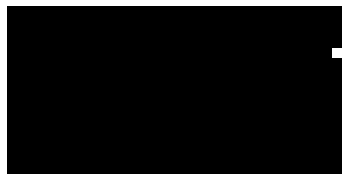

In [16]:
out_folder = './animation/000'
os.makedirs(out_folder, exist_ok=True)

img = save_uniform_ibls(out_folder, 0.01, 1)

100%|██████████| 3/3 [02:13<00:00, 44.50s/it]


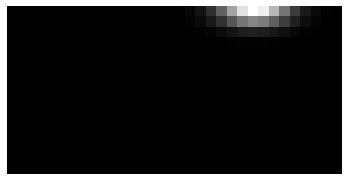

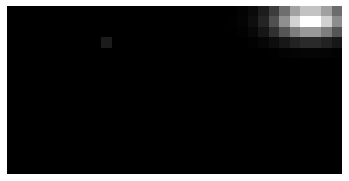

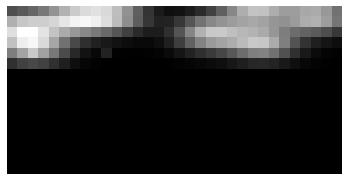

In [29]:
animation_list = [join(test_folder, '001'), join(test_folder, '003'), join(test_folder, '020')]

for folder in tqdm(animation_list):
    os.makedirs(folder, exist_ok=True)
    folder_name = os.path.basename(folder)
    num = int(folder_name)
    save_ibls(folder, num, 0.01)

## Prepare Mitsuba animation

In [52]:
ibl_animation_folder = 'animation'
# animation_folders = get_folders(ibl_animation_folder)
# animation_folders = [join(ibl_animation_folder, '001'), join(ibl_animation_folder, '003'), join(ibl_animation_folder, '020')]
animation_folders = [join(ibl_animation_folder, '001')]
animation_folders.sort()

#todo
cmd_path = 'mistuba_animation.sh'
if os.path.exists(cmd_path):
    print('update bash')
    os.remove(cmd_path)

# mask_file = '/home/ysheng/Dataset/new_dataset/cache/mask/notsimulated_combine_male_short_outfits_genesis8_armani_casualoutfit03_Base_Pose_Standing_A/pitch_15_rot_0_mask.png'
mask_file = '/home/ysheng/Dataset/new_dataset/cache/test_mask/simulated_combine_male_genesis8_matias_hywavybob_dsoset_Base_Pose_Walking_B/pitch_35_rot_0_mask.png'

mask_name = os.path.basename(os.path.dirname(mask_file))
ani_out = '/home/ysheng/Dataset/eval_animation'
cur_out = join(ani_out, mask_name)
os.makedirs(cur_out, exist_ok=True)

dbg, dbg_num = False, 1
with tqdm(total=len(animation_folders)) as pbar:
    for cur_ani_folder in animation_folders:
        ibls = [join(cur_ani_folder, f) for f in os.listdir(cur_ani_folder) if f.find('png') != -1]
        print('{} there are {} ibls'.format(cur_ani_folder, len(ibls)))
        ibls.sort()
        
        ibl_name = os.path.basename(cur_ani_folder)
        cur_ani_out_folder = join(cur_out, ibl_name)
        os.makedirs(cur_ani_out_folder, exist_ok=True)
        
        for i, ibl in enumerate(ibls):
            prefix = os.path.splitext(os.path.basename(ibl))[0]
            
            final_out_file, shadow_out_file = join(cur_ani_out_folder, prefix + '_final.exr'), join(cur_ani_out_folder, prefix + '_shadow.exr')
            render_final = False
            if i == 0:
                render_final=True
                
            mitsuba_render(mask_file, ibl, final_out_file, shadow_out_file, update_cam_param=True,real_ibl=False, write_cmd=True, skip=False, cmd_path=cmd_path, final=render_final)
            
        pbar.update()
        if dbg and pbar.n >= dbg_num:
            break



  0%|          | 0/1 [00:00<?, ?it/s]

update bash
animation/001 there are 720 ibls


  0%|          | 0/1 [00:06<?, ?it/s]


KeyboardInterrupt: 

## Prepare Net animation

In [18]:
ibl_animation_folder = 'animation'
# animation_folders = get_folders(ibl_animation_folder)
# animation_folders = [join(ibl_animation_folder, '001'), join(ibl_animation_folder, '003'), join(ibl_animation_folder, '020')]
animation_folders = [join(ibl_animation_folder, '000')]
animation_folders.sort()

mask_file = '/home/ysheng/Dataset/new_dataset/cache/test_mask/simulated_combine_male_genesis8_matias_hywavybob_dsoset_Base_Pose_Walking_B/pitch_35_rot_0_mask.png'
mask_name = os.path.basename(os.path.dirname(mask_file))
ani_out = '/home/ysheng/Dataset/eval_animation'
cur_out = join(ani_out, mask_name)
os.makedirs(cur_out, exist_ok=True)

dbg, dbg_num = False, 1
with tqdm(total=len(animation_folders)) as pbar:
    for cur_ani_folder in animation_folders:
        ibls = [join(cur_ani_folder, f) for f in os.listdir(cur_ani_folder) if f.find('png') != -1]
        print('{} there are {} ibls'.format(cur_ani_folder, len(ibls)))
        ibls.sort()
        
        ibl_name = os.path.basename(cur_ani_folder)
        cur_ani_out_folder = join(cur_out, ibl_name)
        os.makedirs(cur_ani_out_folder, exist_ok=True)
        
        for i, ibl in enumerate(ibls):
            prefix = os.path.splitext(os.path.basename(ibl))[0]
            out_file = join(cur_ani_out_folder, prefix + '_net.png')
            net_render(mask_file, ibl, out_file, save_npy=False)
            
        pbar.update()
        if dbg and pbar.n >= dbg_num:
            break

options:  Namespace(file='/home/ysheng/.local/share/jupyter/runtime/kernel-b8ed2ea4-b26b-4e2e-9bf8-550d9b697ad0.json', ibl=None, mask=None, output=None, verbose=False, weight='../weights/new_pattern_11-May-09-59-PM.pt')
Device:  cuda:2


  0%|          | 0/1 [00:00<?, ?it/s]

animation/000 there are 2560 ibls


100%|██████████| 1/1 [00:39<00:00, 39.08s/it]


In [8]:
def make_animation(out_fname, render_files, ibl_files):
    ims = []
    fig = plt.figure()
    render_files.sort()
    ibl_files.sort()
    
    for i,f in enumerate(tqdm(render_files)):
        plt.axis('off')
        img = plt.imread(f)
        
        # dbg
        img[np.where(img > 1e-2)] = 1.0
        
        ibl = plt.imread(ibl_files[i])
        w,h = 64, 32
        ibl = cv2.resize(ibl, (w, h))
        
#         cv2.normalize(ibl, ibl, 0.0, 50.0, cv2.NORM_MINMAX)
        ibl = np.clip(ibl, 0.0, 1.0)
        c = img.shape[2]
        img[:h,:w] = ibl[:,:, :c]
        im = plt.imshow(img, animated=True)
        ims.append([im])
        
    ani = animation.ArtistAnimation(fig, ims, interval=24, blit=True, repeat_delay=1000)
    ani.save(out_fname)

dbg = True
search_str = {'mitsuba':'shadow.png', 'net':'net.png'}
def render_animations(render_out_folder, ani_out_folder, typename='mitsuba'):
    models = get_folders(render_out_folder)
    ori_ibl_folder = 'animation/'
    
    with tqdm(total=len(models)) as pbar:
        for model in models:
            ibl_folds = get_folders(model)
            print('{}: {}'.format(model, len(ibl_folds)))

            for ibl in tqdm(ibl_folds):
                model_name, ibl_name = os.path.basename(model), os.path.basename(ibl)
                
                ibl_files = get_files(join(ori_ibl_folder, ibl_name))
                mts_result_files = [join(ibl, f) for f in os.listdir(ibl) if (f.find(search_str['mitsuba']) != -1)]
                net_result_files = [join(ibl, f) for f in os.listdir(ibl) if (f.find(search_str['net']) != -1)]
                mts_out_fname = '{}_{}_mitsuab.mp4'.format(model_name, ibl_name)
                net_out_fname = '{}_{}_net.mp4'.format(model_name, ibl_name)
                
                mts_out_fname = join(ani_out_folder, mts_out_fname)
                net_out_fname = join(ani_out_folder, net_out_fname)
                
                if typename == 'mitsuba':
                    make_animation(mts_out_fname, mts_result_files, ibl_files)
                
                if typename == 'net':
                    make_animation(net_out_fname, net_result_files, ibl_files)
                
                if typename == 'both':
                    make_animation(net_out_fname, net_result_files, ibl_files)
                    make_animation(mts_out_fname, mts_result_files, ibl_files)
                
                if dbg:
                    break
            if dbg:
                break
                
            pbar.update()
            

## Render Mitsuba and Net Animations 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2560 [00:00<?, ?it/s]

/home/ysheng/Dataset/eval_animation/simulated_combine_male_genesis8_matias_hywavybob_dsoset_Base_Pose_Walking_B: 1




  0%|          | 5/2560 [00:00<01:41, 25.25it/s]

  0%|          | 9/2560 [00:00<01:31, 27.90it/s]

  1%|          | 14/2560 [00:00<01:19, 31.85it/s]

  1%|          | 17/2560 [00:00<01:30, 28.05it/s]

  1%|          | 21/2560 [00:00<01:25, 29.53it/s]

  1%|          | 26/2560 [00:00<01:26, 29.20it/s]

  1%|          | 30/2560 [00:00<01:20, 31.57it/s]

  1%|▏         | 36/2560 [00:01<01:10, 35.69it/s]

  2%|▏         | 41/2560 [00:01<01:05, 38.62it/s]

  2%|▏         | 46/2560 [00:01<01:05, 38.32it/s]

  2%|▏         | 50/2560 [00:01<01:08, 36.73it/s]

  2%|▏         | 54/2560 [00:01<01:06, 37.60it/s]

  2%|▏         | 60/2560 [00:01<00:59, 41.73it/s]

  3%|▎         | 65/2560 [00:01<00:56, 43.87it/s]

  3%|▎         | 70/2560 [00:01<01:01, 40.69it/s]

  3%|▎         | 75/2560 [00:02<01:04, 38.75it/s]

  3%|▎         | 80/2560 [00:02<01:04, 38.41it/s]

  3%|▎         | 84/2560 [00:02<01:04, 38.26it/s]

  3%|▎         | 88/2560 [00:02<01:06, 36.97it/s]

  4%|▎         | 92/2560 [00:02

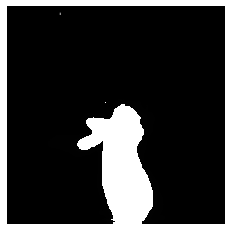

In [9]:
rendering_out_folder = '/home/ysheng/Dataset/eval_animation/'
animation_out = 'ani_out'
os.makedirs(animation_out, exist_ok=True)

render_animations(rendering_out_folder, animation_out, 'net')
# render_animations(rendering_out_folder, animation_out, 'mitsuba')
# render_animations(rendering_out_folder, animation_out, 'both')

## Test for Mitsuba Rendering

shape: (16, 32, 4) min: 0, max: 255


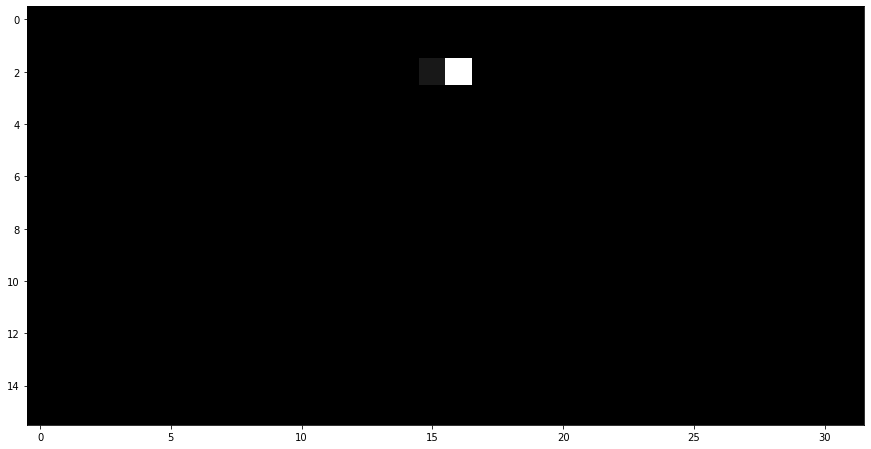

min: 5.826450433232822e-13, max: 1.0
min: -5.165929906070232e-10, max: 1.0


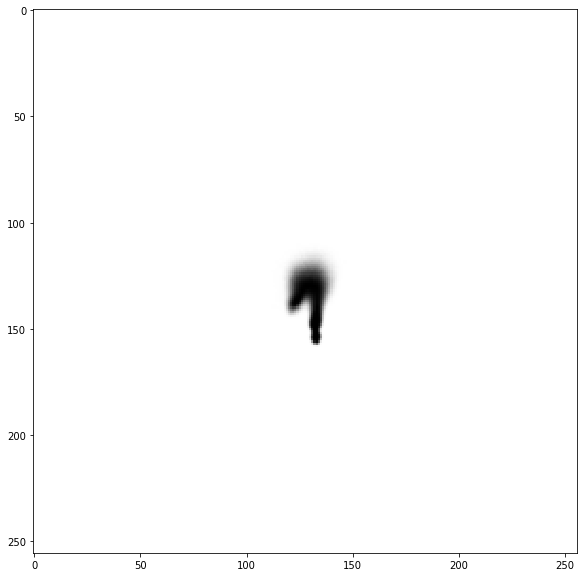

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


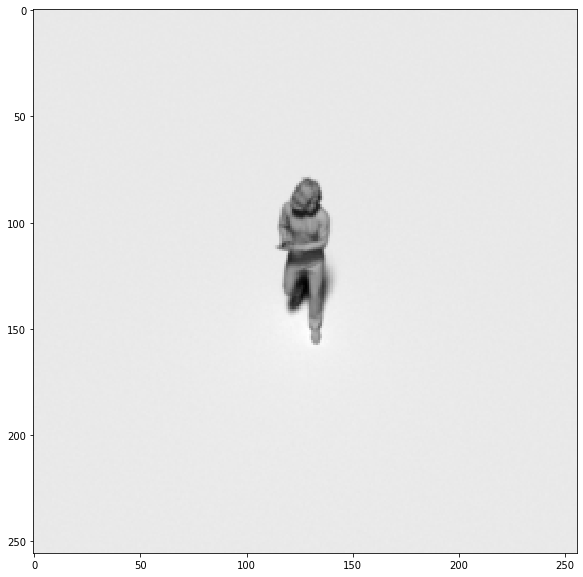

In [31]:
folder = '/home/ysheng/Dataset/eval_animation/simulated_combine_male_genesis8_matias_hywavybob_dsoset_Base_Pose_Walking_B/001'
test_shadow, test_final = join(folder, '000000_shadow.exr'), join(folder, '000000_final.exr')
ibl_file = 'animation/001/000000.png'
ibl = imageio.imread(ibl_file)
print('shape: {} min: {}, max: {}'.format(ibl.shape, np.min(ibl), np.max(ibl)))
show(ibl)

test_shadow_np, test_final_np = imageio.imread(test_shadow), imageio.imread(test_final)

cv2.normalize(test_shadow_np, test_shadow_np, 0.0, 1.0, cv2.NORM_MINMAX)
cv2.normalize(test_final_np, test_final_np, 0.0, 1.0, cv2.NORM_MINMAX)

print('min: {}, max: {}'.format(np.min(test_shadow_np), np.max(test_shadow_np)))
print('min: {}, max: {}'.format(np.min(test_final_np), np.max(test_final_np)))
show(test_shadow_np)
show(test_final_np)

In [ ]:
rendering_out_folder = '/home/ysheng/Dataset/eval_animation/'
animation_out = 'ani_out'
os.makedirs(animation_out, exist_ok=True)

render_animations(rendering_out_folder, animation_out, 'mitsuba')

dbg, dbg_num = True, 1
models = get_folders(mitsuba_out_folder)
with tqdm(total=len(models)) as pbar:
    for model in models:
        ibl_folds = get_folders(model)
        print('{}: {}'.format(model, len(ibl_folds)))
        
        for ibl in ibl_folds:
            mitsuba_files = [join(ibl, f) for f in os.listdir(ibl) if f.find('shadow.png') != -1]
            model_name, ibl_name = os.path.basename(model), os.path.basename(ibl)
            out_fname = '{}_{}_mitsuab.mp4'.format(model_name, ibl_name)
            out_fname = join(animation_out, out_fname)
            make_animation(out_fname, mitsuba_files)
            
        pbar.update()
        
        if dbg and pbar.n >= dbg_num:
            break